Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Accuracy: 78.33333333333333 %

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.75      0.72      0.73        25

    accuracy                           0.78        60
   macro avg       0.78      0.77      0.78        60
weighted avg       0.78      0.78      0.78        60



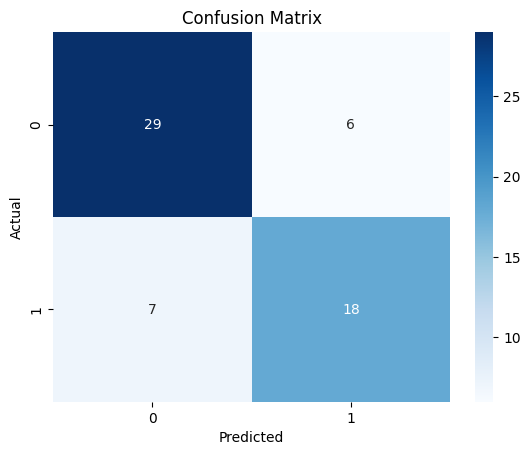

Predicted Class (0=no disease, 1=disease): 0


In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset
data_path = r"D:\Documents\#SLIIT\y4\Y4S2\ML\assignment\dataset\heart_disease_uci.csv"
df = pd.read_csv(data_path)

# Step 3: Preprocessing
df = df.dropna()  # Drop rows with missing values

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 4: Features & Target
X = df.drop('num', axis=1)  # Features
y = df['num']  # Target

# Binarize target: 0 = no disease, 1 = disease
y = np.where(y > 0, 1, 0)

# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Model Training with Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
grid = GridSearchCV(dt, param_grid, cv=5)
grid.fit(X_train, y_train)

# Save best model
best_model = grid.best_estimator_

# Step 8: Evaluation
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Predicting for New Input
# Sample input data
sample_input = {
    'id': 999,                  # Dummy ID
    'age': 58,
    'sex': 1,
    'dataset': 1,
    'cp': 3,
    'trestbps': 140,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,
    'thalch': 170,
    'exang': 0,
    'oldpeak': 1.5,
    'slope': 2,
    'ca': 0,
    'thal': 2
}

# Convert to DataFrame and match training column order
sample_df = pd.DataFrame([sample_input])
sample_df = sample_df[X.columns]  # Ensure correct column order

# Scale the input
sample_scaled = scaler.transform(sample_df)

# Predict
prediction = best_model.predict(sample_scaled)
print(f"Predicted Class (0=no disease, 1=disease): {prediction[0]}")


In [5]:
import joblib

# Save model and scaler
joblib.dump(best_model, "heart_disease_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [6]:
# Second Test Case - likely to result in a disease prediction (class = 1)
sample_input_disease = {
    'id': 1000,                # Dummy ID
    'age': 67,
    'sex': 1,                  # 1 = Male
    'dataset': 1,
    'cp': 0,                   # Typical angina
    'trestbps': 160,           # High blood pressure
    'chol': 300,               # High cholesterol
    'fbs': 1,                  # High fasting blood sugar
    'restecg': 2,
    'thalch': 108,             # Low max heart rate
    'exang': 1,                # Exercise-induced angina
    'oldpeak': 3.5,            # ST depression
    'slope': 0,
    'ca': 2,
    'thal': 3                  # Abnormal thalassemia
}

# Convert to DataFrame
sample_df_disease = pd.DataFrame([sample_input_disease])

# Reorder columns to match training data
sample_df_disease = sample_df_disease[X.columns]

# Scale input using same scaler as training data
sample_scaled_disease = scaler.transform(sample_df_disease)

# Predict
prediction_disease = grid.best_estimator_.predict(sample_scaled_disease)
print(f"Predicted Class (0=no disease, 1=disease): {prediction_disease[0]}")


Predicted Class (0=no disease, 1=disease): 1
